# Scope of Notebook
This notebook is used to analyse the results produced by the execution of _bot\_executor.sh_. This program executes the CAPTCHA solver for the text-based CAPTCHA *TextCAPTCHA* by Rob Tuley. Such a solver attempts to solve text challenges by using different models; those are _Falcon-Mamba_, _RoBERTa_ and _GPT-4o_. The outcome is gathered in the files _falcon\_model\_results.txt_, _roberta\_model\_results.txt_ and _openai\_model\_results.txt_.

The result files are parsed to extract values, and data visualization is made using pandas and Seaborn.
The structure of these files is the same: the CAPTCHA question, the generated answer, and the submission result are each on one line.

In [1]:
'''
This cell extracts the result values from the files 'falcon_model_results.txt',
'roberta_model_results.txt' and 'openai_model_results.txt'.
'''

def extract_results(filename):
    '''
    Function which extracts the total number of tests stored in the file 'filename',
    the successful results and the failed ones. 
    '''
    # Store the total amount of examples.
    samples = !cat $filename | grep 'Result:' | wc -l
    samples = int(samples[0])

    # Store successful samples.
    success_samples = !cat $filename | grep 'passed' | wc -l
    success_samples = int(success_samples[0])

    # Store failed samples
    failed_samples = samples - success_samples
    return (samples, success_samples, failed_samples)

def gain_results():
    '''
    Function which computes the obtained values for all files that store results.
    '''
    files = ['falcon_model_results.txt', 'roberta_model_results.txt', 'openai_model_results.txt']
    results = []
    for file in files:
        results.append(extract_results(file))
    return results

In [2]:
'''
This cell computes the success-rate as percentage based on the extracted values.
'''
def compute_success_rate(tot, success):
    '''
    Function which returns the success rate as a percentage.
    '''
    return success * 100 / tot

def compute_all_rates(results):
    '''
    Compute the success rate for all models.
    '''
    rates = []
    for tot, success, _ in results:
        rates.append(compute_success_rate(tot, success))
    return rates

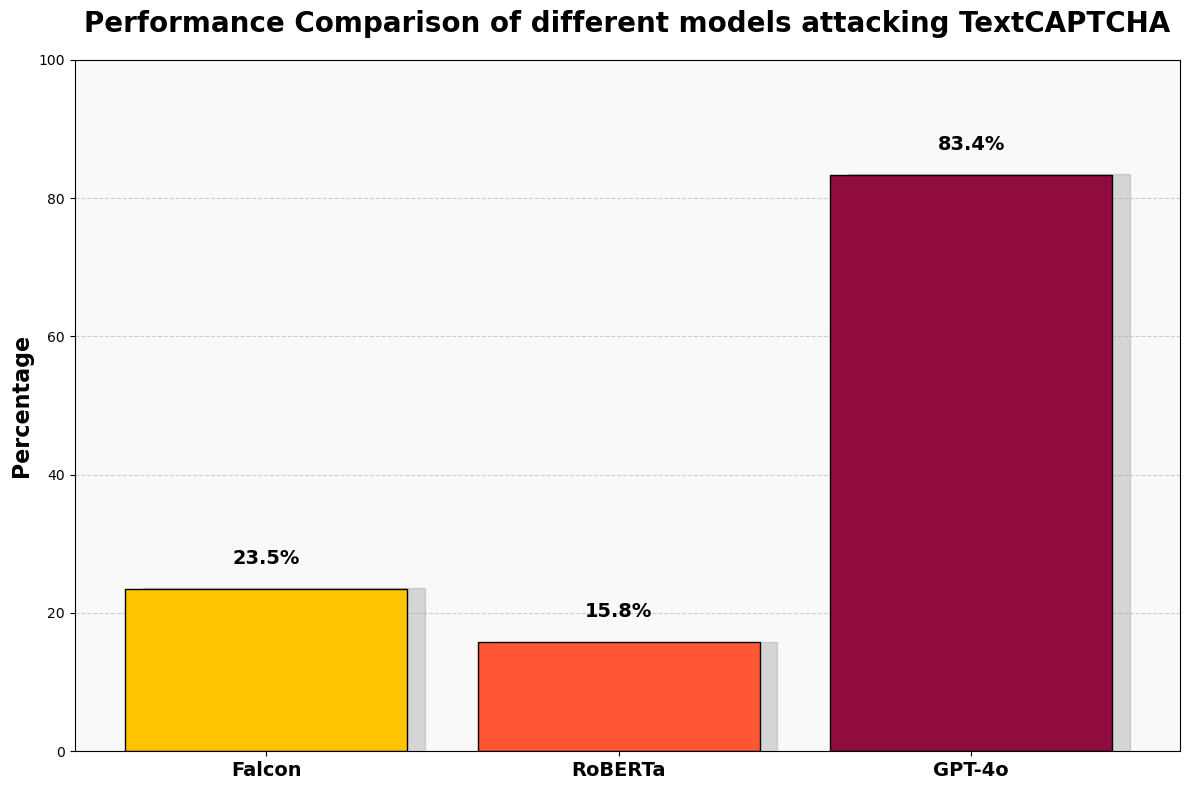

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_barplot(percentages, labels):
    '''
    Creates a bar plot of the score values.
    '''
    bar_colors = ['#FFC300', '#FF5733', '#900C3F']
    shadow_color='#a0a0a0'

    fig, ax = plt.subplots(figsize=(12, 8))
    x_positions = np.arange(len(labels))

    # Create bars with gradients and shadows.
    for i, (x, percentage) in enumerate(zip(x_positions, percentages)):
        # Shadow effect.
        shadow = Rectangle((x - 0.4 + 0.05, 0 - 0.05), 0.8, percentage + 0.1,
                           color=shadow_color, alpha=0.4, zorder=1)
        ax.add_patch(shadow)
        ax.bar(x, percentage, width=0.8, color=bar_colors[i], edgecolor='black', zorder=2)

        # Add annotations on top of bars.
        ax.text(x, percentage + 3, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

    ax.set_xticks(x_positions)
    ax.set_xticklabels(labels, fontsize=14, fontweight='bold')
    ax.set_ylabel('Percentage', fontsize=16, fontweight='bold')
    ax.set_title('Performance Comparison of different models attacking TextCAPTCHA', fontsize=20, fontweight='bold', pad=20)

    ax.set_ylim(0, 100)
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    
    ax.set_facecolor('#f9f9f9')

    plt.tight_layout()
    plt.savefig("text-based-results.png", dpi=300, bbox_inches="tight")
    plt.show()

# Example Usage
percentages = compute_all_rates(gain_results())
labels = ['Falcon', 'RoBERTa', 'GPT-4o']
create_barplot(percentages, labels)
